In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [3]:
de = pd.read_csv('DEvideos.csv')

In [4]:
de.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
video_id                  40840 non-null object
trending_date             40840 non-null object
title                     40840 non-null object
channel_title             40840 non-null object
category_id               40840 non-null int64
publish_time              40840 non-null object
tags                      40840 non-null object
views                     40840 non-null int64
likes                     40840 non-null int64
dislikes                  40840 non-null int64
comment_count             40840 non-null int64
thumbnail_link            40840 non-null object
comments_disabled         40840 non-null bool
ratings_disabled          40840 non-null bool
video_error_or_removed    40840 non-null bool
description               39288 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [6]:
de.drop(['video_id','publish_time','video_error_or_removed','ratings_disabled','comments_disabled','tags'], axis=1 ,inplace = True)

In [20]:
de.head()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
0,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup über den (veränderten) Beat von...


In [21]:
de.tail()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
40835,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,1394530,46778,501,9878,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,Find out more about Kingdom Hearts 3: https://...
40836,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,139733,11155,119,1968,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,Patreon: http://www.patreon.com/YMSTwitch: htt...
40837,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,26054,364,11,8,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,Günter versucht sich als Ersthelfer bei einem ...
40838,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,1139198,14900,1421,1587,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,"Vom verstoßenen Söldner zum legendären Helden,..."
40839,18.14.06,Гироскутер - Азбука Уральских Пельменей Б - Ур...,Уральские Пельмени,23,316328,11394,352,550,https://i.ytimg.com/vi/go-F6xvezAM/default.jpg,Популярный номер из нового шоу Азбука Уральски...


In [12]:
f_mostlikes_channel = de.likes > 2500000
f_mostviews_channel = de.views > 10000000
f_mostdislike_channel = de.dislikes > 5000
f_mostcomment_channel = de.comment_count > 1000000
de[f_mostlikes_channel & f_mostviews_channel & f_mostcomment_channel]

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
35954,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
36291,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


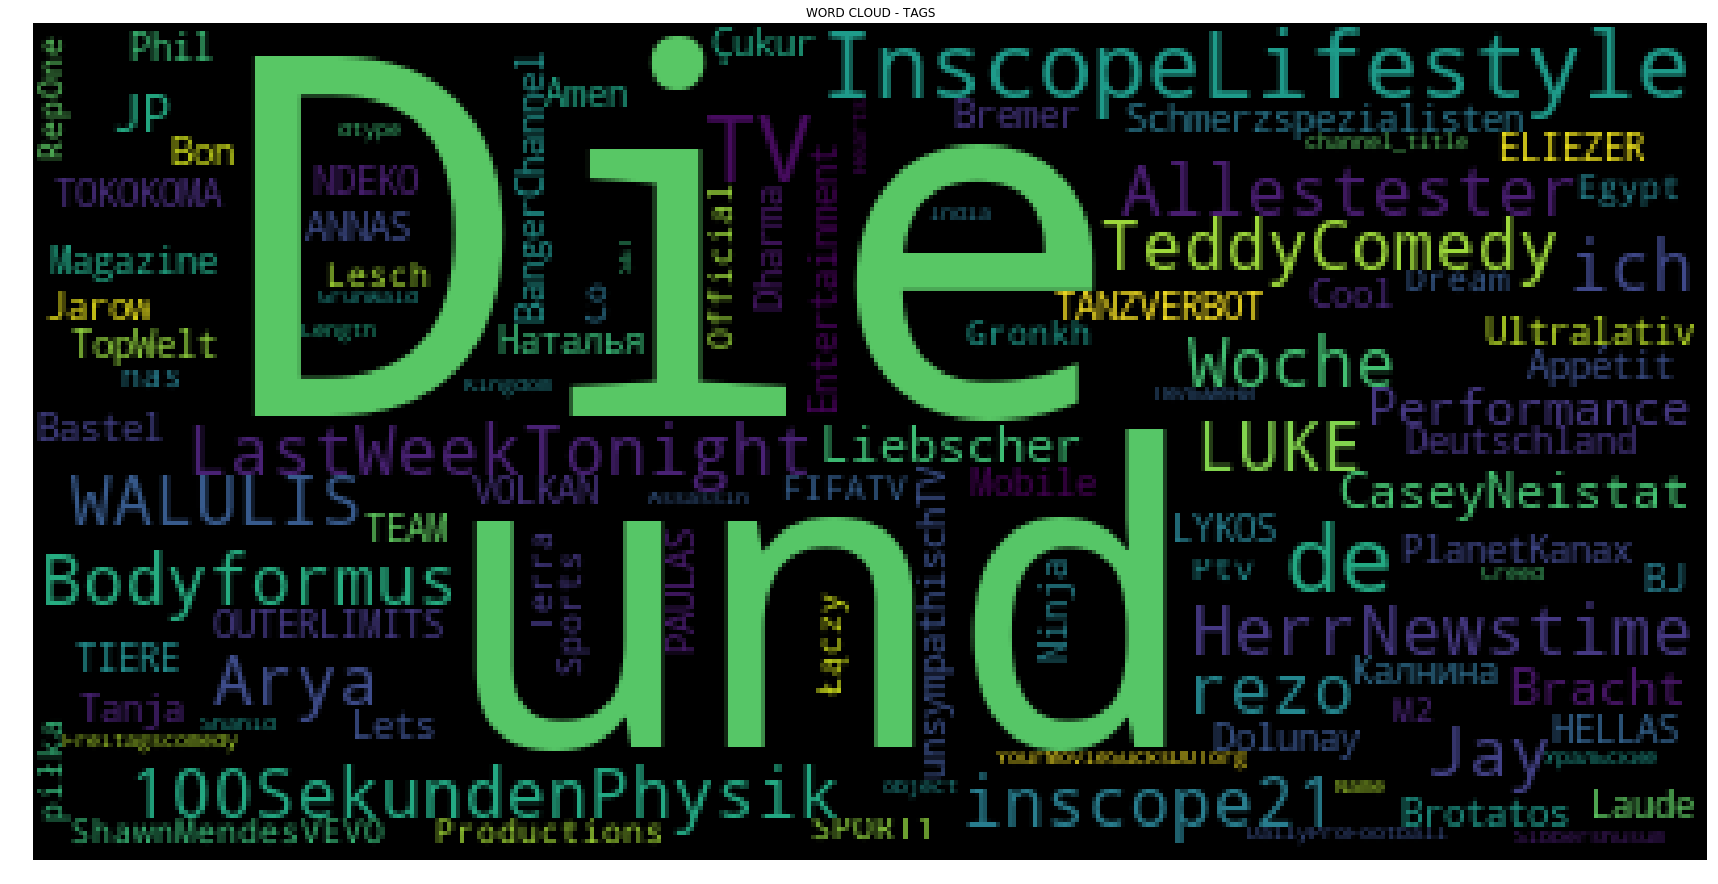

In [13]:
df_youtube = pd.DataFrame(de)
plt.figure(figsize = (30,30))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['channel_title']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


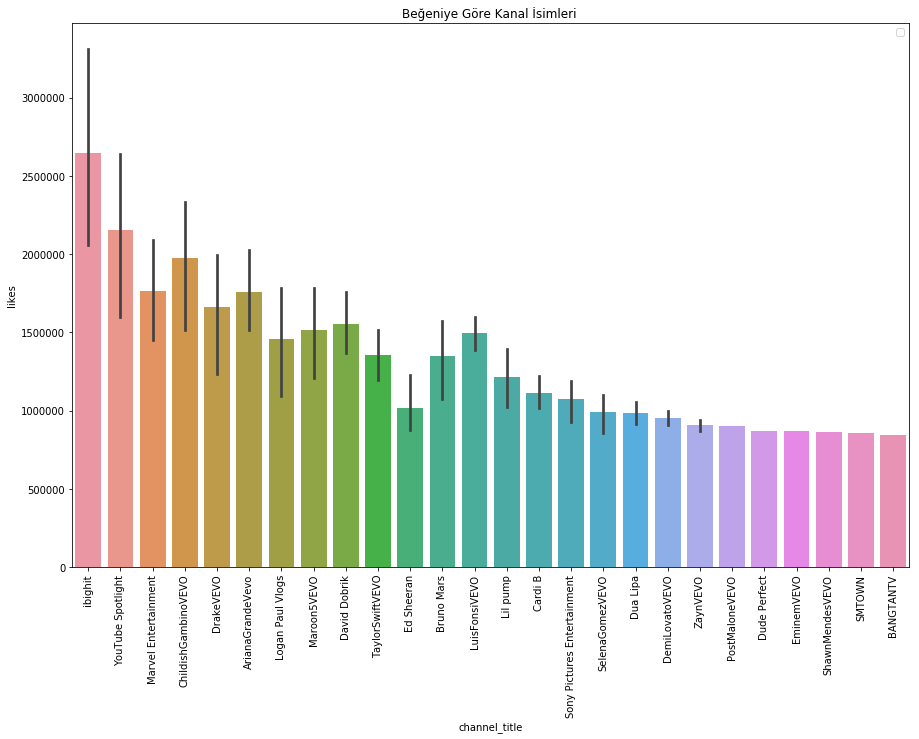

In [14]:
new_index = de['likes'].sort_values(ascending = False).index.values
sorted_data = de.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['likes'].head(100),data = sorted_data)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğeniye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


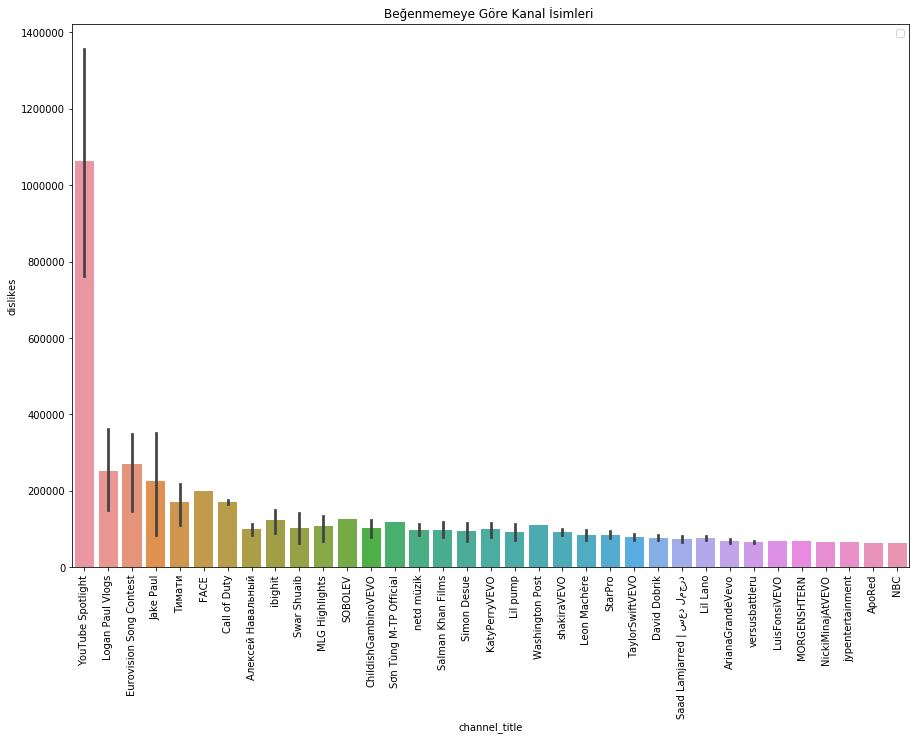

In [15]:
new_index = de['dislikes'].sort_values(ascending = False).index.values
sorted_data = de.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['dislikes'].head(100),data = de)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğenmemeye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


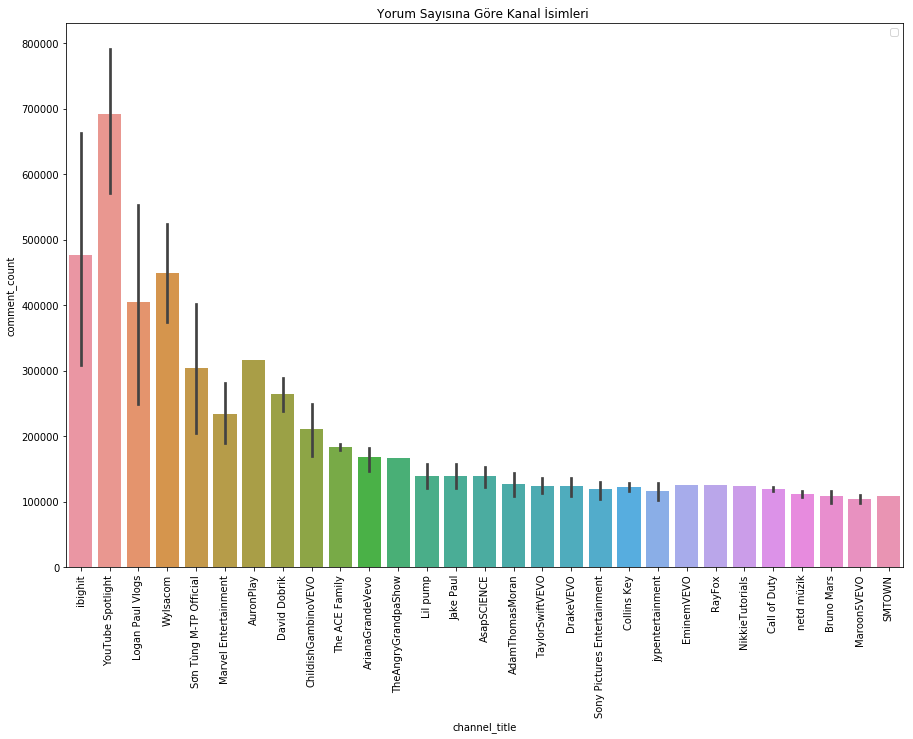

In [16]:
new_index = de['comment_count'].sort_values(ascending = False).index.values
sorted_data = de.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['comment_count'].head(100),data = de)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Yorum Sayısına Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


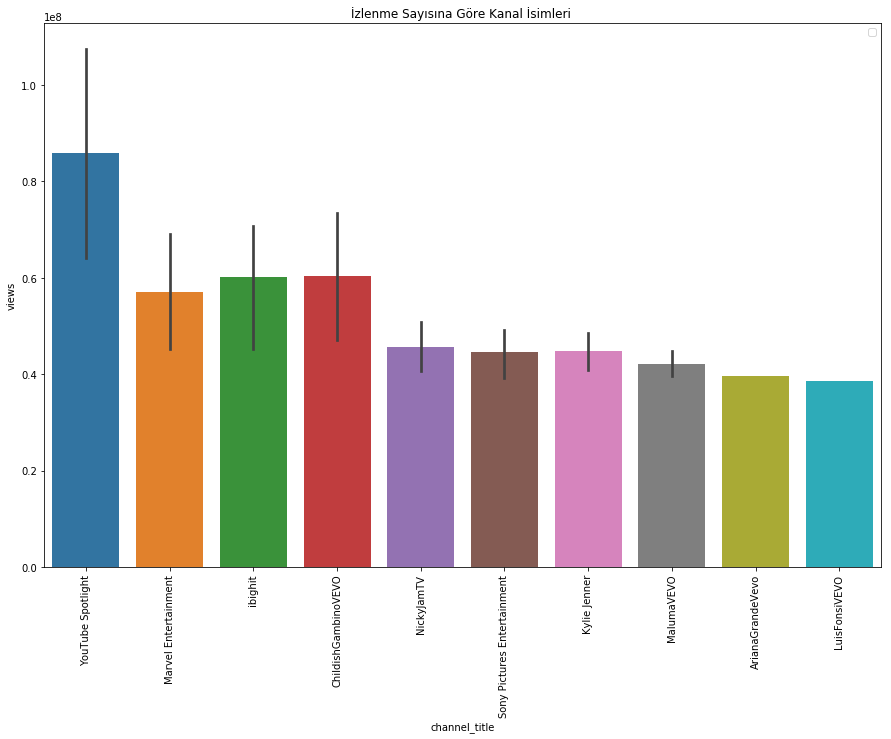

In [19]:
new_index = de['views'].sort_values(ascending = False).index.values
sorted_data = de.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(30) , y = sorted_data['views'].head(30),data = de)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('İzlenme Sayısına Göre Kanal İsimleri ')
plt.show()